LSTM

In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

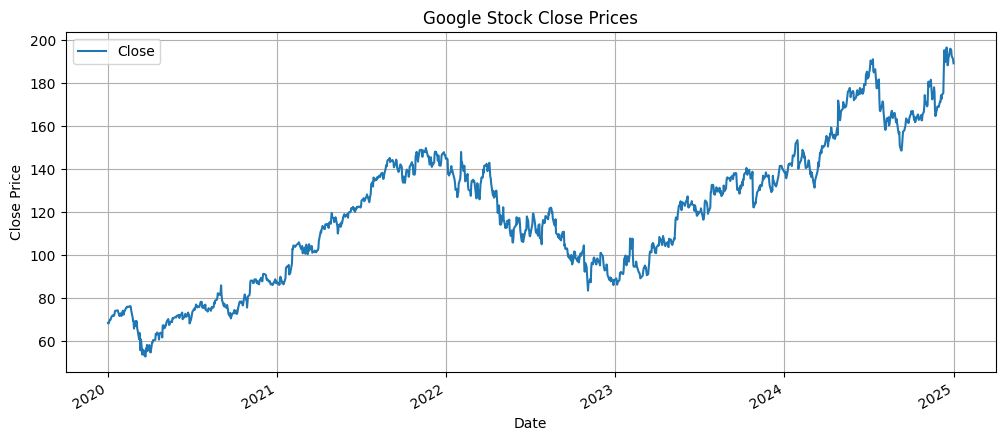

In [ ]:
# Load data
df = pd.read_csv("googl_data_2020_2025.csv")
df_cleaned = df.iloc[2:].copy()
df_cleaned.reset_index(drop=True, inplace=True)

# Convert columns
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Price'])
df_cleaned['Close'] = pd.to_numeric(df_cleaned['Close'], errors='coerce')
df_cleaned.dropna(subset=['Close'], inplace=True)
df_cleaned.set_index('Date', inplace=True)
df_close = df_cleaned[['Close']]

# Visualize
df_close.plot(figsize=(12, 5), title='Google Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [ ]:
# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(df_close)

# Create dataset
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_close, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
# Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.1063
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0028
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0012
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0013
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0011
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0012
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0011
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.6024e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0011
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0011
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0011
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 9.7911e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 9.2687e-04
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 9.1817e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


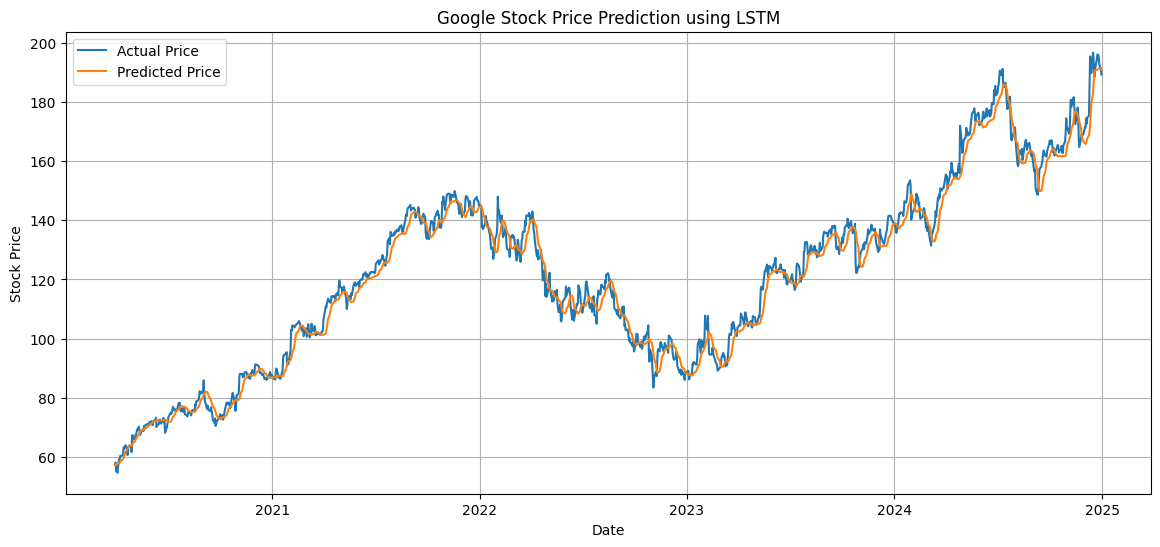

In [ ]:
# Predict
predicted_scaled = model.predict(X)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_close.index[time_step:], actual, label='Actual Price')
plt.plot(df_close.index[time_step:], predicted, label='Predicted Price')
plt.title('Google Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print(f"📈 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📈 Evaluation Metrics:
Mean Absolute Error (MAE): 3.2405
Mean Squared Error (MSE): 17.4059
Root Mean Squared Error (RMSE): 4.1720
R² Score: 0.9820


XG Boost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [ ]:
# Load and clean data
df = pd.read_csv("googl_data_2020_2025.csv")
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)

df['Date'] = pd.to_datetime(df['Price'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df.set_index('Date', inplace=True)
df_close = df[['Close']]


In [ ]:
# Create lag features (e.g., 60 previous days)
def create_lag_features(data, lag=60):
    df_feat = pd.DataFrame()
    for i in range(1, lag + 1):
        df_feat[f'lag_{i}'] = data.shift(i)
    df_feat['target'] = data.values
    df_feat.dropna(inplace=True)
    return df_feat

lag_days = 60
features_df = create_lag_features(df_close['Close'], lag_days)


In [ ]:
# Split into train/test
split_index = int(len(features_df) * 0.8)
train = features_df.iloc[:split_index]
test = features_df.iloc[split_index:]

X_train, y_train = train.drop('target', axis=1), train['target']
X_test, y_test = test.drop('target', axis=1), test['target']


In [ ]:
# Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📈 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📈 Evaluation Metrics:
Mean Absolute Error (MAE): 22.2107
Mean Squared Error (MSE): 691.5239
Root Mean Squared Error (RMSE): 26.2968
R² Score: -2.1690


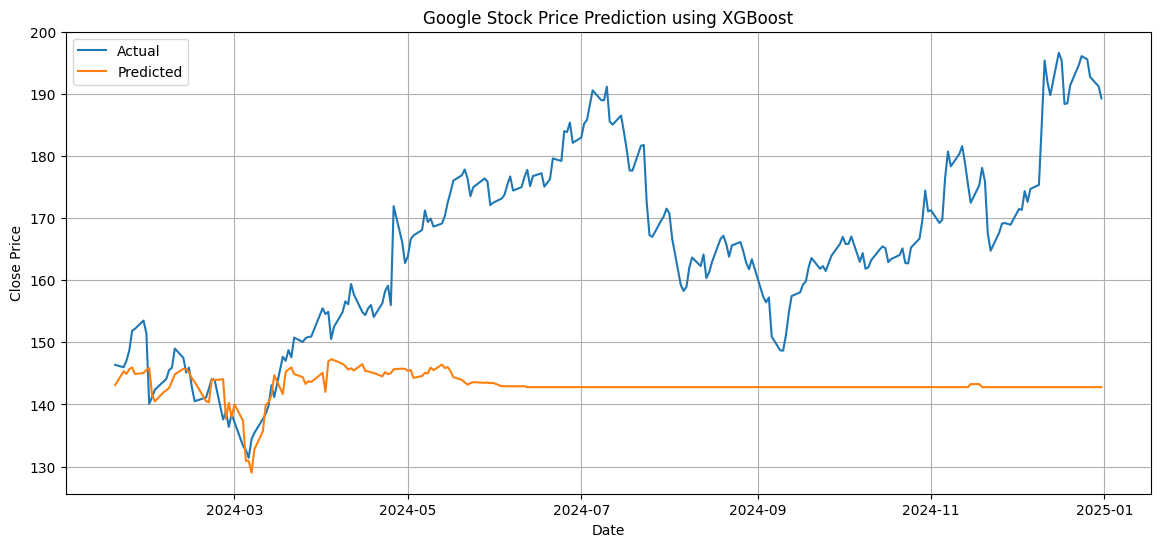

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.title("Google Stock Price Prediction using XGBoost")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


GRU

In [ ]:
!pip install pandas numpy matplotlib scikit-learn tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense



In [ ]:
file_path = "/content/googl_data_2020_2025.csv"
df_raw = pd.read_csv(file_path, skiprows=2)
df_raw.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [ ]:
df_raw['High'] = pd.to_numeric(df_raw['High'], errors='coerce')
df_raw['Low'] = pd.to_numeric(df_raw['Low'], errors='coerce')
df_raw['Date'] = pd.to_datetime(df_raw['Date'], errors='coerce')
df_raw.dropna(subset=['Date', 'High', 'Low'], inplace=True)
df_raw['GDU'] = ((df_raw['High'] + df_raw['Low']) / 2) - 10
df_raw['GDU'] = df_raw['GDU'].apply(lambda x: max(0, x))
df = df_raw[['Date', 'GDU']].set_index('Date')

In [ ]:
scaler = MinMaxScaler()
gdu_scaled = scaler.fit_transform(df[['GDU']])
sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(gdu_scaled)):
    X.append(gdu_scaled[i-sequence_length:i])
    y.append(gdu_scaled[i])
X, y = np.array(X), np.array(y)

In [ ]:
model = Sequential([
    GRU(units=50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1028
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0052
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.2254e-04
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6732e-04
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0920e-04
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8921e-04
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8832e-04
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.9568e-04
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8052e-04
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.7603e-04
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8241e-04
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.6640e-04
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.7995e-04
Epoch 15/20
39/39 ━━━━━━━━━

In [ ]:
predictions = model.predict(X)
predictions_rescaled = scaler.inverse_transform(predictions)
actual_rescaled = scaler.inverse_transform(y)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


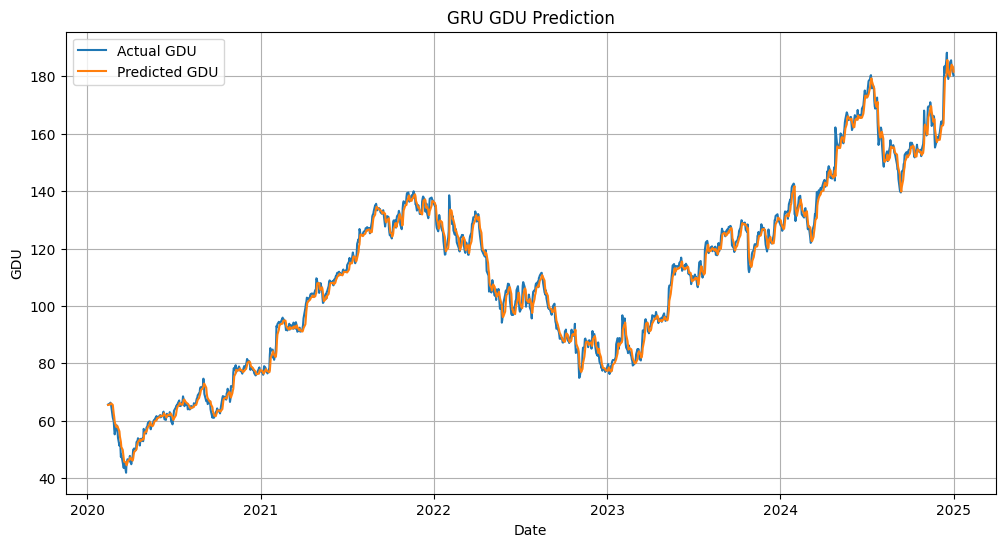

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index[sequence_length:], actual_rescaled, label='Actual GDU')
plt.plot(df.index[sequence_length:], predictions_rescaled, label='Predicted GDU')
plt.title("GRU GDU Prediction")
plt.xlabel("Date")
plt.ylabel("GDU")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate on actual vs predicted (rescaled)
y_true = actual_rescaled.flatten()
y_pred = predictions_rescaled.flatten()

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print the metrics
print("📊 Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.4f}")
print(f"MSE  (Mean Squared Error):       {mse:.4f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.4f}")
print(f"R²   (Coefficient of Determination): {r2:.4f}")


📊 Model Evaluation Metrics:
MAE  (Mean Absolute Error):      1.9217
MSE  (Mean Squared Error):       6.6567
RMSE (Root Mean Squared Error):  2.5801
R²   (Coefficient of Determination): 0.9935


In [1]:
#Import necessary  libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
#Import data

GSP = pd.read_csv("/content/googl_data_2020_2025.csv")

In [3]:
GSP.head(2)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
GSP.tail(2)

,Price,Adj Close,Close,High,Low,Open,Volume
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700
1259,2024-12-31 00:00:00+00:00,189.3000031,189.3000031,191.9600067,188.5099945,191.0800018,17466900


In [5]:
GSP.shape

(1260, 7)

In [6]:
GSP.dtypes

,0
Price,object
Adj Close,object
Close,object
High,object
Low,object
Open,object
Volume,object


In [7]:
GSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [8]:
GSP.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,2024-12-31 00:00:00+00:00,105.5872421,105.9700012,138,128.9600067,138.5,22288000
freq,1,3,3,3,2,3,3


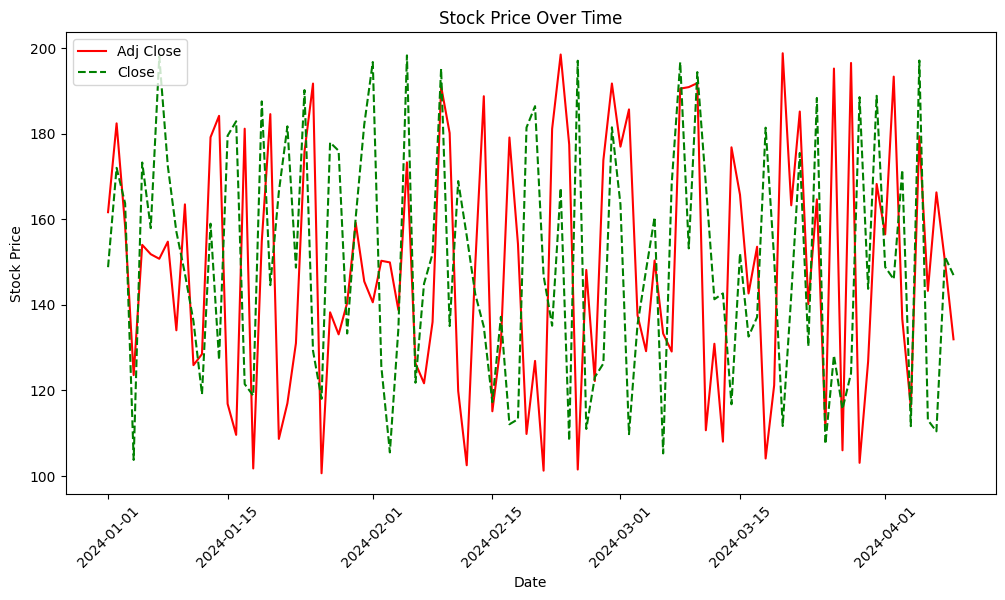

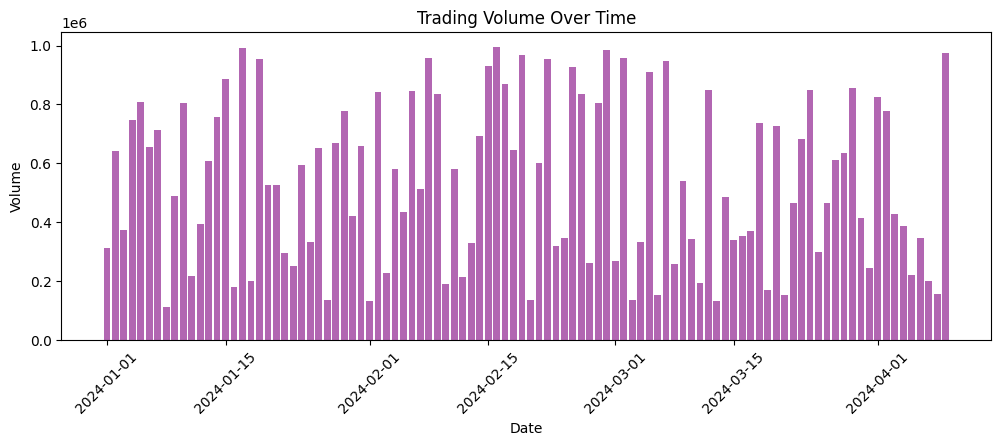

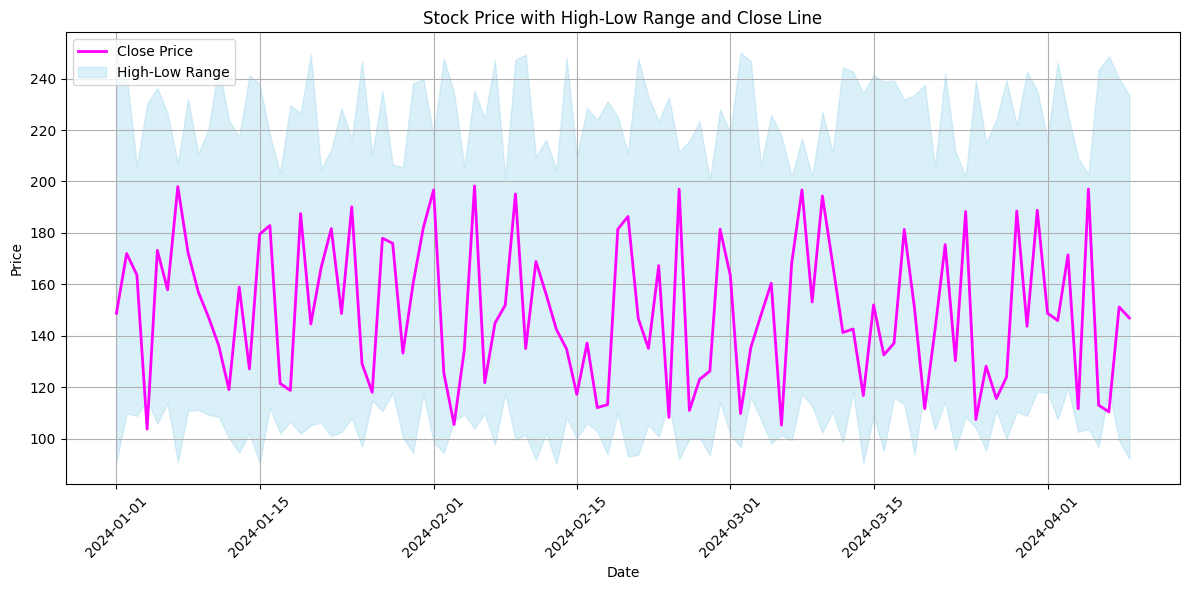

In [9]:
#Graphs
import plotly.graph_objects as go

df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=100),
    'Open': np.random.uniform(100, 200, 100),
    'High': np.random.uniform(200, 250, 100),
    'Low': np.random.uniform(90, 120, 100),
    'Close': np.random.uniform(100, 200, 100),
    'Adj Close': np.random.uniform(100, 200, 100),
    'Volume': np.random.randint(100000, 1000000, 100)
})

df.set_index('Date', inplace=True)

# Plot 1: Line Plot of Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='red')
plt.plot(df.index, df['Close'], label='Close', color='green', linestyle='dashed')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend(loc='upper left')
plt.show()

# Plot 2: Volume Over Time
plt.figure(figsize=(12, 4))
plt.bar(df.index, df['Volume'], color='purple', alpha=0.6)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

# Plot 3: High vs. Low Price Range
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], color='magenta', label='Close Price', linewidth=2)
plt.fill_between(df.index, df['Low'], df['High'], color='skyblue', alpha=0.3, label='High-Low Range')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with High-Low Range and Close Line')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

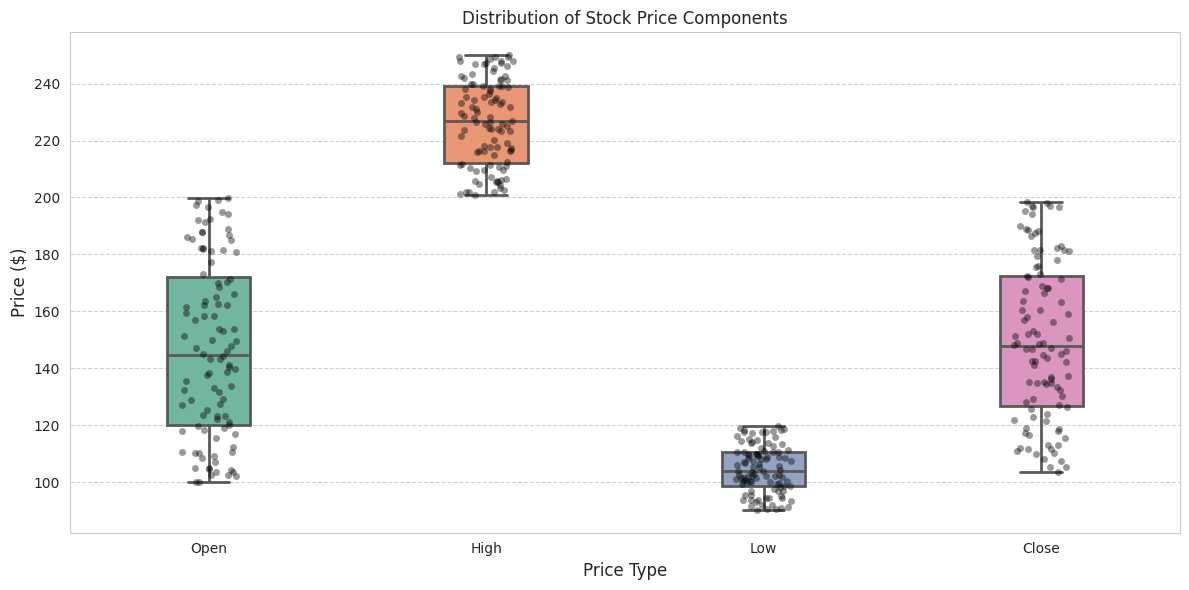

In [10]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Enhanced boxplot
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']],
            palette='Set2',
            width=0.3,
            linewidth=2,
            fliersize=1)  # Controls outlier dot size

# Titles and labels
plt.title('Distribution of Stock Price Components', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Price Type', fontsize=12)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Optional: Add individual data points for clarity (stripplot)
sns.stripplot(data=df[['Open', 'High', 'Low', 'Close']],
              color='black', alpha=0.4, jitter=True)

plt.tight_layout()
plt.show()


In [11]:
#Condlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])
fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price', xaxis_rangeslider_visible=False)
fig.show()

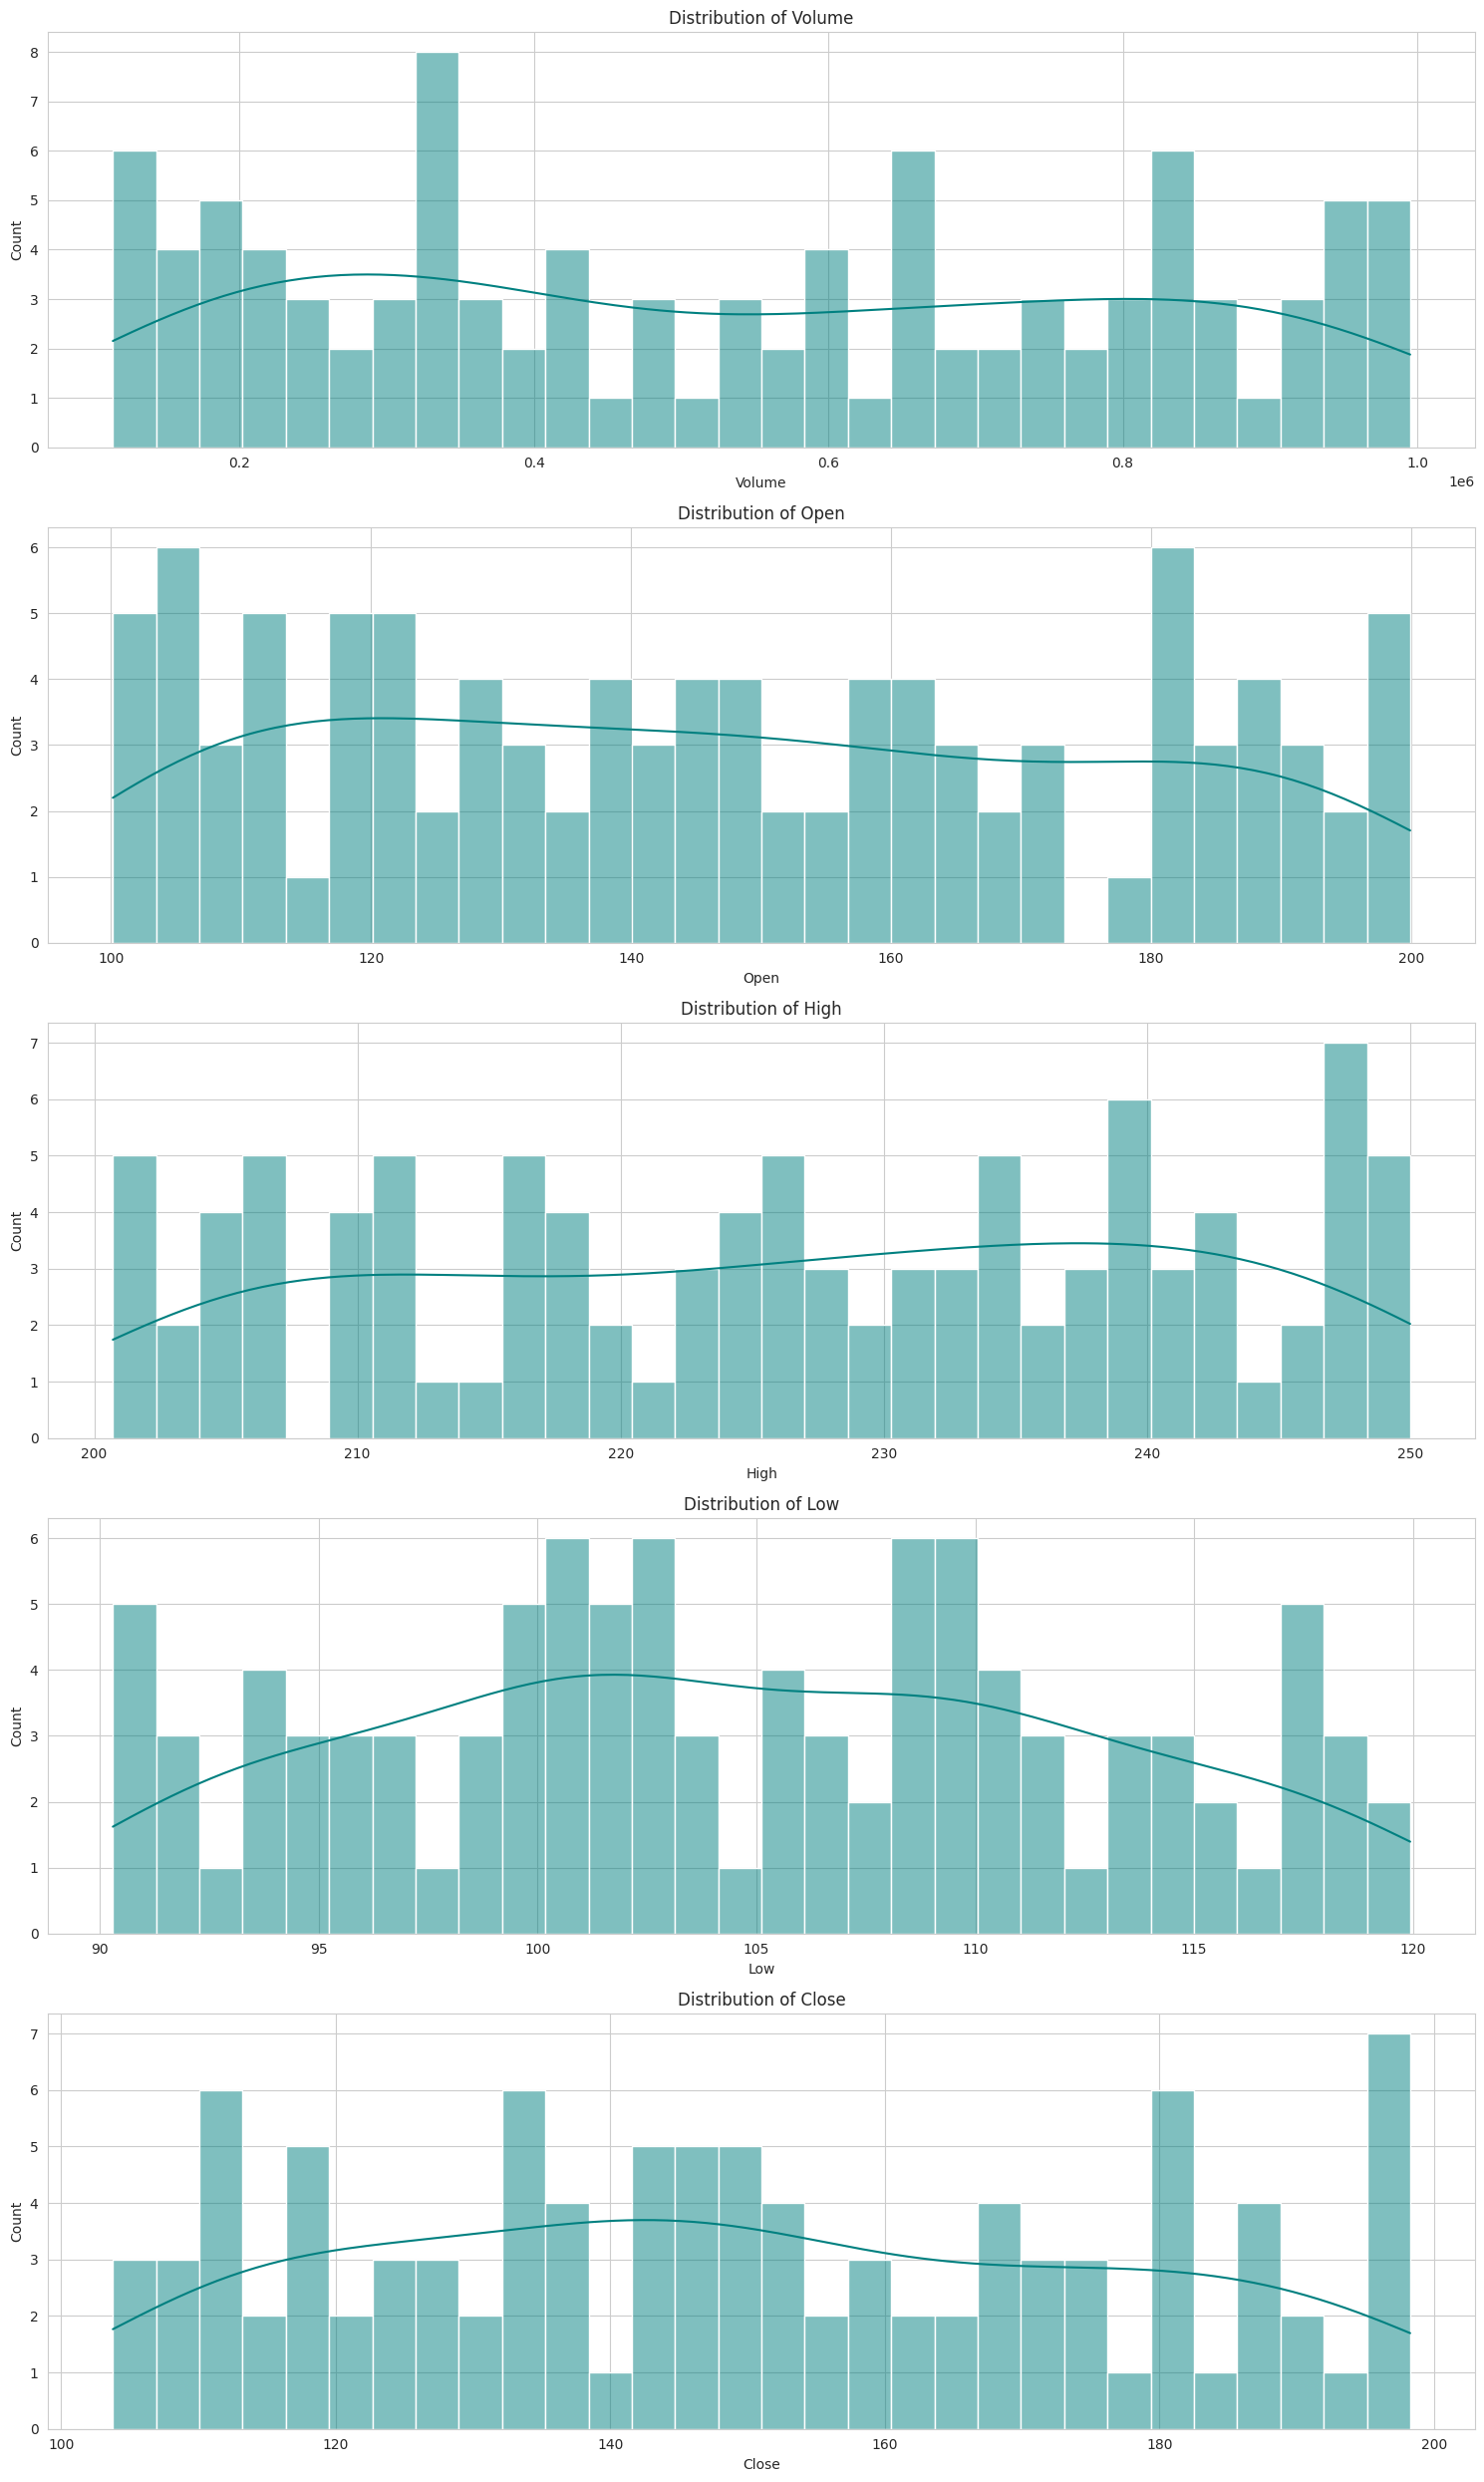

In [12]:
def plot_histograms(df, columns, bins=30):
    plt.figure(figsize=(15, 5 * len(columns)))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        sns.histplot(df[col], bins=bins, kde=True, color='teal')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Example:
plot_histograms(df, ['Volume', 'Open', 'High', 'Low', 'Close'])


In [18]:
features =df[['Open','High','Close','Low','Volume']]
x = features[:int(len(df)-1)]
Target=df[['Adj Close']]
y = Target[:int(len(df)-1)]
y = y.values.ravel()

In [19]:
model = RandomForestRegressor(n_estimators=300, random_state=42) #create the model

In [20]:
model.fit(x,y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [21]:
predictions = model.predict(x)
print('The model score is:', model.score(x,y)) #Testing the model

The model score is: 0.8551415334276762


In [22]:
mse = mean_squared_error(y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 120.74884955091713


In [23]:
r2 = r2_score(y, predictions)
print('R-squared:', r2)

R-squared: 0.8551415334276762


In [24]:
new_data = df[['Open','High','Close','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:',prediction)
print('Actual value is:',df[['Adj Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [149.71627674]
Actual value is: 131.94294811014822


ARIMA

In [25]:
data = list(GSP['Adj Close'])

In [27]:
# Assuming 'GSP' is your DataFrame and 'Adj Close' is the column
data = GSP['Adj Close'].apply(pd.to_numeric, errors='coerce').dropna().tolist()

# Now, apply the adfuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Num of Lags:', result[2])
print('Num of Observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
  print("\t",key,":",value)

ADF Statistic: -0.8118374506936993
p-value: 0.8156201522665419
Num of Lags: 0
Num of Observations: 1257
Critical Values:
	 1% : -3.4355629707955395
	 5% : -2.863842063387667
	 10% : -2.567995644141416


In [28]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.9 MB/s eta 0:00:00


In [29]:
pip install numpy==1.24.4 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is 

In [31]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 85.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
!pip install --upgrade --force-reinstall numpy==1.24.4
!pip install --upgrade --force-reinstall pmdarima

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.2

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached Cython-3.0.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.3 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
^C


In [1]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Import data
GSP = pd.read_csv("/content/googl_data_2020_2025.csv")

# ... (other code) ...

# ARIMA Section
# Assuming 'GSP' is your DataFrame and 'Adj Close' is the column you want to use
data = GSP['Adj Close'].apply(pd.to_numeric, errors='coerce').dropna().tolist()
# Convert 'Adj Close' to numeric, handle errors, drop NaNs, and convert to a list

# Now you can use 'data' in the following lines
x_train = data[:-80]
x_test = data[-80:]
print(len(x_train), len(x_test))

1178 80


In [4]:
x_train = data[:-80]
x_test = data[-80:]
print(len(x_train), len(x_test))

1178 80


In [5]:
from pmdarima import auto_arima

# Automatically find the best (p, d, q) using AIC/BIC scoring
auto_model = auto_arima(
    x_train,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,           # Let it determine d with tests (ADF, KPSS)
    seasonal=False,   # Assume non-seasonal since GOOGL data is daily
    stepwise=True,    # Faster search
    trace=True        # Show progress
)

# Show summary and best order
print(auto_model.summary())
print("Best ARIMA order:", auto_model.order)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5266.295, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5265.940, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5265.862, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5265.420, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5265.398, Time=1.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5267.397, Time=2.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5267.397, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5267.493, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5267.682, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5269.031, Time=1.94 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5264.962, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5265.109, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5265.178, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5266.960, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5266.960, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5266.793, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5266.958, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5268.591, Time=0.67 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 10.030 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1178
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2629.481
Date:                Fri, 18 Apr 2025   AIC                           5264.962
Time:                        05:03:17   BIC                           5280.174
Sample:                             0   HQIC                          5270.697
                               - 1178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6485      0.240      2.704      0.007       0.178

In [6]:
stepwise_fit = auto_arima(data, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5685.280, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5685.364, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5687.094, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5687.071, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5685.533, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5686.351, Time=2.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5686.281, Time=1.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5689.979, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5689.219, Time=1.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5684.891, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5687.103, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5687.295, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5686.201, Time=0.34 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.487 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2838.446
Date:                Fri, 18 Apr 2025   AIC                           5684.891
Time:                        05:03:39   BIC                           5705.437
Sample:                             0   HQIC                          5692.613
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0134      0.013      1.032      0.302      -0.012

In [7]:
GSP_data = list(GSP['Adj Close'])
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,2))

In [8]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2837.935
Date:                Fri, 18 Apr 2025   AIC                           5685.871
Time:                        05:03:58   BIC                           5711.553
Sample:                             0   HQIC                          5695.523
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5610      0.112     13.934      0.000       1.341       1.781
ar.L2         -0.8463      0.096     -8.836      0.000      -1.034      -0.659
ma.L1         -1.5846      0.114    -13.893      0.000      -1.808      -1.361
ma.L2          0.8480      0.100      8.471      0.000       0.652       1.044
sigma2         5.3521      0.121     44.330      0.000       5.116       5.589
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1085.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
start = len(x_train) # Assign the length of x_train to start
end = len(x_train) + len(x_test) - 1 # Assign the ending index to end
pred = model.predict(start=start, end=end, typ='levels') # Predict using the calculated start and end indices

In [10]:
start-len(x_train)
end-len(x_train)+len(x_test)-1
pred-model.predict(start=start, end=end, typ='levels')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
s = pd.Series(pred, index=GSP.index[-80:])
s

,0
1180,150.779903
1181,148.821614
1182,148.737104
1183,151.080635
1184,154.372507
...,...
1255,194.907056
1256,196.130862
1257,195.412698
1258,192.511810


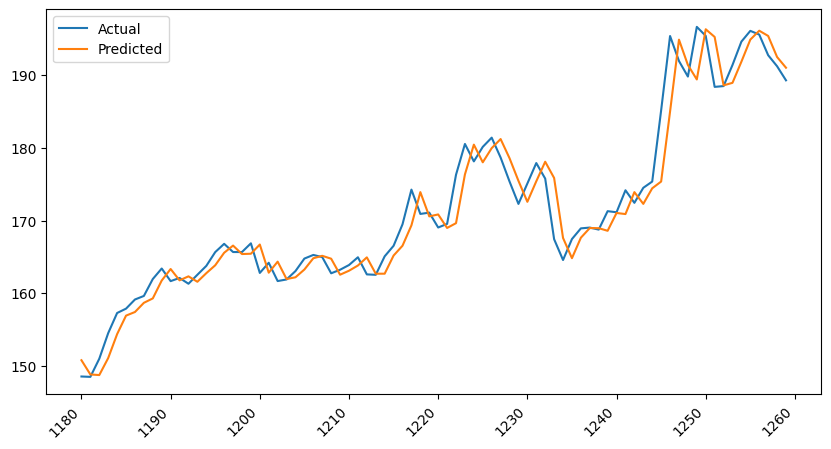

In [13]:
# Convert 'Adj Close' column to numeric
GSP['Adj Close'] = pd.to_numeric(GSP['Adj Close'], errors='coerce')

# Now, plot the data:
plt.figure(figsize=(10, 5), dpi=100)
GSP['Adj Close'][-80:].plot(label='Actual')
s.plot(label='Predicted')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

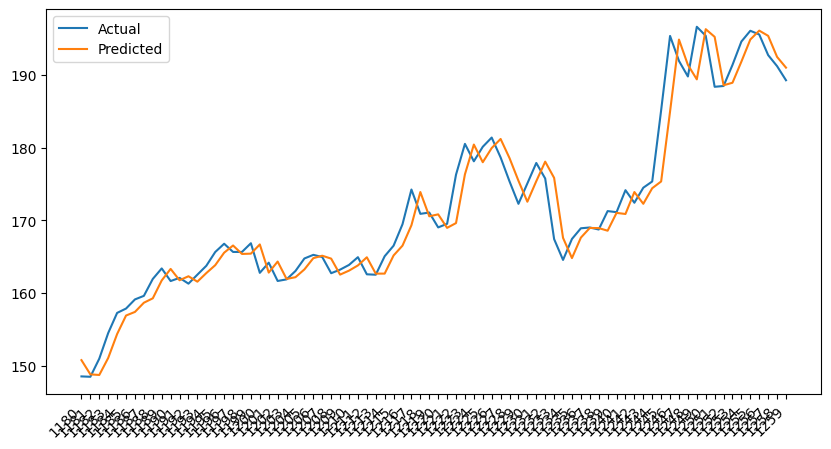

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5), dpi=100)

# Convert the index of 'GSP' to a list of strings for plotting
# This avoids Matplotlib trying to interpret the dates directly.
x_axis_values = GSP.index.astype(str).tolist()

# Plot the 'Adj Close' values using the string representation of dates
plt.plot(x_axis_values[-80:], GSP['Adj Close'][-80:], label='Actual')

# Plot the predicted values, also using the string representation of the dates
plt.plot(x_axis_values[-80:], s.values, label='Predicted')

plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

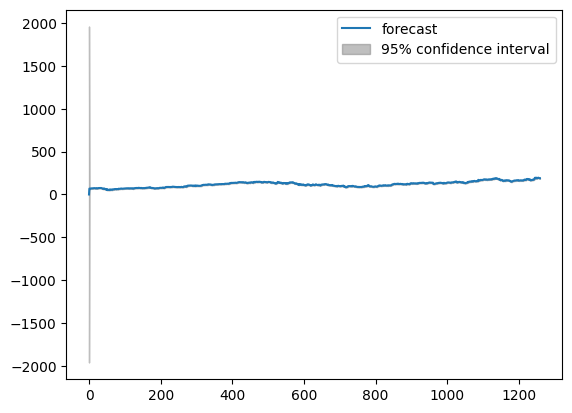

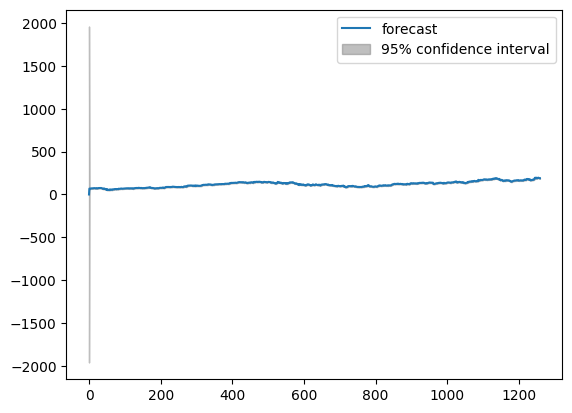

In [15]:
from statsmodels.graphics.tsaplots import plot_predict

# Ensure start_date and end_date are within the data index
start_date = GSP.index[0]  # Start at the beginning of the data
end_date = GSP.index[-1]   # End at the last point of the data


plot_predict(model, start=start_date, end=end_date, dynamic=False)

In [16]:
np.sqrt(mean_squared_error(x_test,pred))

3.016135486114153

In [17]:
r2_score(x_test,pred)

0.9358884054486127

In [18]:
# Assuming you have determined the appropriate values for p, d, and q
# (e.g., through auto_arima or other methods), assign them here:
p = 1  # Example value for the autoregressive order
d = 1  # Example value for the integrated order
q = 1  # Example value for the moving average order

# Now you can use these values in the ARIMA model:
model = ARIMA(data, order=(p, d, q)).fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
pred_future = model.predict(start=len(data), end=len(data)+20, typ='levels')
print(pred_future)

[189.34003705 189.37295912 189.4000327  189.42229677 189.44060571
 189.45566213 189.46804384 189.47822598 189.48659931 189.49348514
 189.49914773 189.50380439 189.5076338  189.51078294 189.51337264
 189.5155023  189.51725362 189.51869383 189.5198782  189.52085216
 189.52165311]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [20]:
import datetime

start_date = datetime.datetime(2023,1,3) # Starting from first weekday of Jan
dates = []
while len(dates) < 21:  # 21 trading days ≈ 1 month
    if start_date.weekday() < 5:  # 0=Monday, ..., 4=Friday
        dates.append(start_date)
    start_date += datetime.timedelta(days=1)
    if start_date.weekday() < 5:  # 0=Monday, ..., 4=Friday
        dates.append(start_date)
    start_date += datetime.timedelta(days=1)


In [22]:
import datetime

start_date = datetime.datetime(2024,4,3)  # Starting from first weekday of Jan
dates = []
while len(dates) < 21:  # 21 trading days ≈ 1 month
    if start_date.weekday() < 5:  # 0=Monday, ..., 4=Friday
        dates.append(start_date) #add date only if it's a weekday
    start_date += datetime.timedelta(days=1) #then increment to the next day

pred_series = pd.Series(pred_future, index=dates) #create a new Pandas series with matching data and index length, use pred_future instead of pred_future2
print(pred_series)

2024-04-03    189.340037
2024-04-04    189.372959
2024-04-05    189.400033
2024-04-08    189.422297
2024-04-09    189.440606
2024-04-10    189.455662
2024-04-11    189.468044
2024-04-12    189.478226
2024-04-15    189.486599
2024-04-16    189.493485
2024-04-17    189.499148
2024-04-18    189.503804
2024-04-19    189.507634
2024-04-22    189.510783
2024-04-23    189.513373
2024-04-24    189.515502
2024-04-25    189.517254
2024-04-26    189.518694
2024-04-29    189.519878
2024-04-30    189.520852
2024-05-01    189.521653
dtype: float64


In [23]:
pred_future2 = model.forecast(steps=21)
print(pred_future2)

[189.34003705 189.37295912 189.4000327  189.42229677 189.44060571
 189.45566213 189.46804384 189.47822598 189.48659931 189.49348514
 189.49914773 189.50380439 189.5076338  189.51078294 189.51337264
 189.5155023  189.51725362 189.51869383 189.5198782  189.52085216
 189.52165311]


In [24]:
print("Forecast values:", len(pred_future2))
print("Dates:", len(dates))

Forecast values: 21
Dates: 21


In [25]:
pred_series = pd.Series(pred_future2, index=dates)
print(pred_series)

2024-04-03    189.340037
2024-04-04    189.372959
2024-04-05    189.400033
2024-04-08    189.422297
2024-04-09    189.440606
2024-04-10    189.455662
2024-04-11    189.468044
2024-04-12    189.478226
2024-04-15    189.486599
2024-04-16    189.493485
2024-04-17    189.499148
2024-04-18    189.503804
2024-04-19    189.507634
2024-04-22    189.510783
2024-04-23    189.513373
2024-04-24    189.515502
2024-04-25    189.517254
2024-04-26    189.518694
2024-04-29    189.519878
2024-04-30    189.520852
2024-05-01    189.521653
dtype: float64


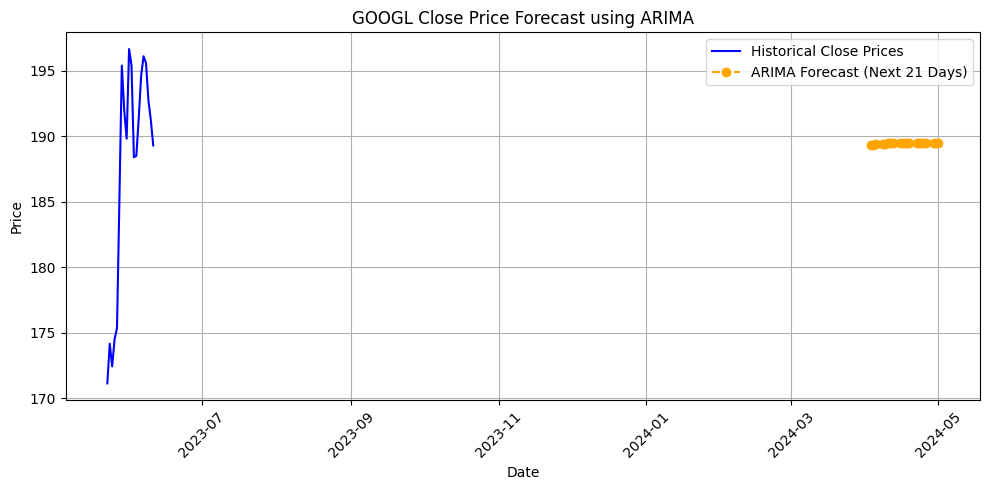

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'data' to a Pandas Series with a DatetimeIndex
# Assuming your data has a frequency (e.g., daily, monthly), adjust accordingly
data_series = pd.Series(data, index=pd.date_range(start='2020-01-01', periods=len(data), freq='D'))

# Combine the actual data and forecast for plotting
plt.figure(figsize=(10, 5))

# Use the Pandas Series for plotting
plt.plot(data_series.index[-20:], data_series.values[-20:], label='Historical Close Prices', color='blue')
plt.plot(pred_series.index, pred_series.values, label='ARIMA Forecast (Next 21 Days)', color='orange', linestyle='--', marker='o')

plt.title('GOOGL Close Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()